In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
df = pd.read_csv("Twitch_2018.csv")

In [3]:
def monthly():
    dfa = df.copy()
    dfa = dfa.dropna()
    games=[]
    for i in dfa["Game Title"]:
        games.append(i)
    for i in games:
        print(i,end=", ")

Which games made the top 500 every month of 2018? (Which games had values for each month in the Peak Viewers Per Month tab?)

In [4]:
monthly()

7 Days to Die, Age of Empires II, Alien: Isolation, Always On, Arena of Valor, ARK, Arma 3, Battlefield 1, Battlerite, Black Desert Online, Black Squad, Blade and Soul, Bloodborne, Board Games, Borderlands 2, Brawlhalla, Call of Duty: Black Ops III, Celeste, Chess, Cities: Skylines, Clash Royale, Counter-Strike: Global Offensive, Cuphead, Dark Souls, Dark Souls II: Scholar of the First Sin, Dark Souls III, Darkest Dungeon, Dauntless, DayZ, Dead by Daylight, Dead Cells, Deceit, Destiny 2, Diablo II: Lord of Destruction, Diablo III: Reaper of Souls, Divinity: Original Sin II, Dofus, Don't Starve Together, Dota 2, Dragon Ball FighterZ, Dungeons & Dragons, Dying Light, Elite: Dangerous, Enter the Gungeon, Escape From Tarkov, Eternal, Euro Truck Simulator 2, Europa Universalis IV, EVE Online, Factorio, Fallout 4, Fate/Grand Order, Final Fantasy VII, FINAL FANTASY XIV Online, For Honor, Fortnite, Friday the 13th: The Game, FTL: Faster Than Light, Games + Demos, Garry's Mod, Gears of War 4, G

In [5]:
def ViewMax(month):
    high = df[month]
    game= df['Game Title']
    top=0
    topIndex=[]
    for i in range(len(high)):
        if high[i] > top:
            top=0
            topIndex=[]
            top=high[i]
            topIndex.append(i)
        elif high[i] == top:
            topIndex.append(i)
    for i in topIndex:
        print(f"{month}: {game[i]}")


Which game had the Max Viewers for each Month?  
    Output Example:
    January: Game
    Februrary: Game
    March: Game
etc etc etc


In [6]:
months=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
for i in months:
    ViewMax(i)

January: Counter-Strike: Global Offensive
February: PLAYERUNKNOWN'S BATTLEGROUNDS
March: Fortnite
April: Fortnite
May: Fortnite
June: E3 2018
July: Fortnite
August: Boxing Fight
September: Counter-Strike: Global Offensive
October: League of Legends
November: League of Legends
December: The Game Awards


In [7]:
def popular(game):
    dfa = df.copy()
    title=dfa['Game Title']
    dfa.loc[:,'Row Total'] = dfa.sum(skipna=True, axis=1)
    totalView=0
    for i in range(len(title)):
        if game in title[i]:
            value = dfa['Row Total'][i]
            totalView+=value
    return totalView

In [8]:
def makeGraphs(items,titly,xlab,ylab,thing,option):
    if option:
        plt.bar(thing,items)
        plt.xlabel(xlab)
        plt.ylabel(ylab)
        plt.xticks(rotation='vertical')
    else:
        plt.pie(items,labels=thing,autopct='%1.1f%%')
    plt.title(titly,fontsize=9)
    plt.legend(bbox_to_anchor=(1.1,1.05))
    plt.show()

According to this data, which game series was more popular during the year of 2018:
Call of Duty
Battlefield
FIFA
GTA
Mario
Pokemon
Final Fantasy
*** Use a Pie Chart to support your answer ***   

C:\Users\YOUNGL~1\AppData\Local\Temp/ipykernel_13956/2823051288.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dfa.loc[:,'Row Total'] = dfa.sum(skipna=True, axis=1)
C:\Users\YOUNGL~1\AppData\Local\Temp/ipykernel_13956/2823051288.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dfa.loc[:,'Row Total'] = dfa.sum(skipna=True, axis=1)
C:\Users\YOUNGL~1\AppData\Local\Temp/ipykernel_13956/2823051288.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dfa.loc[:,'Row Total'] = dfa.sum(s

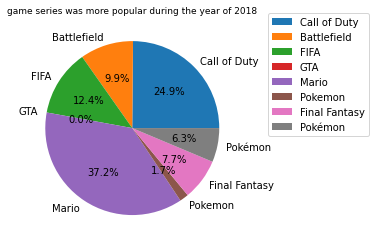

In [9]:
games=["Call of Duty","Battlefield","FIFA","GTA","Mario","Pokemon","Final Fantasy","Pokémon"]
values=[]
for i in games:
    values.append(popular(i))
makeGraphs(values,"game series was more popular during the year of 2018",None,None,games,False)

In [10]:
def worseLegoGame(game):
    dfa = df.copy()
    title=dfa['Game Title']
    dfa.loc[:,'Row Total'] = dfa.sum(skipna=True, axis=1)
    low = dfa['Row Total']
    uni = dfa['Row Total'].unique()
    uni.sort()
    bottom=uni[-1]
    bottomIndex=[]
    for i in range(len(low)):
        if game in title[i]:
            if low[i] < bottom:
                bottom=0
                bottomIndex=[]
                bottom=low[i]
                bottomIndex.append(i)
            elif low[i] == bottom:
                bottomIndex.append(i)
    for i in bottomIndex:
        print(f"{title[i]} with a total view of {low[i]}")

Which Lego game was the least popular throughout 2018?

In [11]:
worseLegoGame('LEGO')

LEGO Star Wars: The Complete Saga with a total view of 12131.0


C:\Users\YOUNGL~1\AppData\Local\Temp/ipykernel_13956/2554386648.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dfa.loc[:,'Row Total'] = dfa.sum(skipna=True, axis=1)


In [12]:
def mostMonth(option):
    if option:
        months=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
        dfa = df.copy()
        dfa.loc['Total'] = dfa.sum(skipna=True,axis=0)
        del dfa['Game Title']
        values=[]
        top=0
        topIndex=[]
        for i in dfa.loc["Total"]:
            values.append(i)
        for i in range(len(values)):
            if values[i] > top:
                topIndex=[]
                topIndex.append(i)
                top=values[i]
        for i in topIndex:
            print(f"{months[i]}: viewers {values[i]}")
    else:
        months=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
        dfa = df.copy()
        dfa.loc['Total'] = dfa.sum(skipna=True,axis=0)
        del dfa['Game Title']
        values=[]
        top=0
        topIndex=[]
        for i in dfa.loc["Total"]:
            values.append(i)
        makeGraphs(values,"a graph to show which month has the highest volume of viewers","Month","Viewers",months,True)

Which month had the most viewers?

In [13]:
mostMonth(True)

January: viewers 25767838.0


a graph to show which month has the highest volume of viewers 
answer: becauase twitch spammer headed to jail during january

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


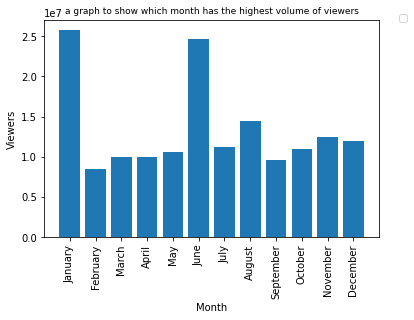

In [14]:
mostMonth(False)

What is Pokémon: Let’s Go, Pikachu!/Eevee! ? Answer: Nintendo Switch remakes of the first generation of Pokemon games from 1996

Is your favorite game on this list? Answer: Yes

In [59]:
def topTen():
    dfa = df.copy()
    dfa.loc[:,'Row Total'] = dfa.sum(skipna=True, axis=1)
    uni=dfa["Row Total"].unique()
    uni.sort()
    top = uni[-10:]
    topIndex=[]
    games=[]
    month=[]
    months=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    monthData=[]
    for i in range(12):
        month.append(i+1)
    for i in top:
        topIndex.append(dfa.index[dfa["Row Total"]==i].tolist())
    for i in topIndex:
        games.append(df.loc[i,"Game Title"].item())
    print(top)
    for i in range(len(months)):
        monthData.append([])
        for j in topIndex:
            print(dfa[months[i]])
            if not(math.isnan (dfa[months[i]][j])):
                monthData[i].append(dfa[months[i][j]])
            else:
                monthData[i].append(0)
        
topTen()

[1817345. 1862675. 1966707. 2023443. 2519435. 2985486. 3763906. 5030780.
 6398598. 8360933.]
0       109987.0
1            NaN
2        17611.0
3            NaN
4         3765.0
          ...   
1533         NaN
1534         NaN
1535         NaN
1536         NaN
1537    107214.0
Name: January, Length: 1538, dtype: float64
0       109987.0
1            NaN
2        17611.0
3            NaN
4         3765.0
          ...   
1533         NaN
1534         NaN
1535         NaN
1536         NaN
1537    107214.0
Name: January, Length: 1538, dtype: float64


C:\Users\YOUNGL~1\AppData\Local\Temp/ipykernel_13956/2152558984.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dfa.loc[:,'Row Total'] = dfa.sum(skipna=True, axis=1)


TypeError: string indices must be integers

Recreate the graph in Python so it only shows the top 10 games 